In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad


Antes de nada, definimos una función para crear un archivo, la vamos a usar mucho.

In [ ]:
def crearArchivo(fichero):
  file = open(fichero, 'w', encoding='utf8')
  file.close()

# Introducción

### Ecosistema aleatorio

In [ ]:
def GenerarM(S, d, C, media, sigma):
  a = media - np.sqrt(3.0)*sigma
  b = media + np.sqrt(3.0)*sigma
  M = a*np.random.rand(S, S) + b*np.random.rand(S, S)
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j]=0.0
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Empezamos creando la funcion que genere una matriz aleatoria con una gaussiana, la anterior que hemos hecho
# ha sido con una distribucion uniforme
def GenerarMRandomGauss(S, d, C, media, sigma):
  M = np.random.normal(loc = media, scale=sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j]=0.0
      else:
        M[i, j] = d
  
  return M

Vamos a sacar 10 matrices para una red random, con los parámetros: 

\begin{equation}
  \begin{split}
    &\mu = 0\\
    &\sigma = 1\\
    &C = 0.25\\
    &S = 250\\**texto en negrita**
  \end{split}
\end{equation}

In [ ]:
for i in range(10):
  crearArchivo('M'+str(i)+'.dat')
  file = open('M' + str(i) + '.dat', 'w', encoding = 'utf8')
  M = GenerarMRandomGauss(250, -1.0, 0.25, 0.0, 1.0)
  autovalores, autovectores = np.linalg.eig(M)
  for j in range(250):
    file.write(str(np.real(autovalores[j])) + ' ' + str(np.imag(autovalores[j])) + '\n')
  file.close()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


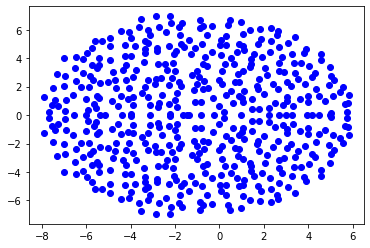

In [ ]:
# Generamos la matriz comunidad con S = 100, d = -1.0, C = 0.2, media 0 y sigma 1
S = 500
M = GenerarM(S, -1.0, 0.2, 0.0, 1.0)

# Sacamos los autovalores
autovalores, autovectores = np.linalg.eig(M)

# Sacamos la parte real y la iamginaria
real = np.zeros_like(autovalores)
imag = np.zeros_like(autovalores)
for i in range(S):
  real[i] = np.real(autovalores[i])
  imag[i] = np.imag(autovalores[i])

plt.plot(real, imag, 'bo')


Hemos sacado los autovalores de la matriz comunidad a partir de la distribucion uniforme, pero se puede hacer con otra distribucion y saldria lo mismo

### Red predador-presa

En esta red, tenemos que generar la matriz de la siguiente manera, fijamos los elementos de la diagonal a -d, como antes; con probabilidad C, el elemento $M_{ij}$ sale de una distribucion de media 0 (de momento) y sigma, mientras que el elemento $M_{ji}$ será de signo opuesto al otro; y con probabillidad 1-C de ser los dos 0.

In [ ]:
def GenerarPredadorPresa(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  a = media - np.sqrt(3.0)*sigma
  b = media + np.sqrt(3.0)*sigma
  M = a*np.random.rand(S, S) + b*np.random.rand(S, S)
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] > 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
def GenerarPredadorPresaGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] > 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
for i in range(10):
  crearArchivo('M'+str(i)+'.dat')
  file = open('M' + str(i) + '.dat', 'w', encoding = 'utf8')
  M = GenerarMRandomGauss(250, -1.0, 0.25, 0.0, 1.0)
  autovalores, autovectores = np.linalg.eig(M)
  for j in range(250):
    file.write(str(np.real(autovalores[j])) + ' ' + str(np.imag(autovalores[j])) + '\n')
  file.close()

In [ ]:
M = GenerarPredadorPresa(S, -1.0, 0.2, 0.0, 1.0)
# Sacamos los autovalores
autovalores, autovectores = np.linalg.eig(M)

# Sacamos la parte real y la iamginaria
real = np.zeros_like(autovalores)
imag = np.zeros_like(autovalores)
for i in range(S):
  real[i] = np.real(autovalores[i])
  imag[i] = np.imag(autovalores[i])

plt.plot(real, imag, 'bo')

NameError: ignored

### Red predador presa con el modelo cascada

In [ ]:
# Vamos a hacer la tercera funcion para generar una red predador presa con el modelo de cascada:
def GenerarPredadorPresaCascade(S, d, C, media, sigma):
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    j = 0
    if(j>i):
      M[i, j] = 0.0
    else:
        num = np.random.rand()
        if(num > C):
          M[i, j], M[j, i] = 0.0, 0.0
        else:
          M[i, j] = np.abs(M[i, j])
          M[j, i] = -np.abs(M[j, i])
    j += 1
  for i in range(S):
    M[i, i] = d
  return M

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


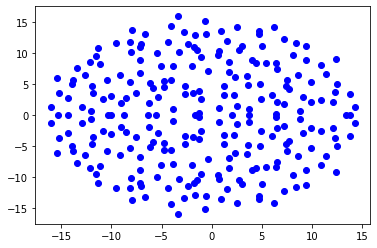

In [ ]:
M = GenerarPredadorPresaCascade(S, -1.0, 0.2, 0.0, 1.0)
# Sacamos los autovalores
autovalores, autovectores = np.linalg.eig(M)

# Sacamos la parte real y la iamginaria
real = np.zeros_like(autovalores)
imag = np.zeros_like(autovalores)
for i in range(S):
  real[i] = np.real(autovalores[i])
  imag[i] = np.imag(autovalores[i])

plt.plot(real, imag, 'bo')

### Competición

In [ ]:
# Empezamos sacando la función con la cual generar las redes competitivas
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarCompeticionGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j] > 0):
            M[i, j] = (-1.0)*M[i, j]
          if(M[j, i] > 0):
            M[j, i] = -1.0*M[j, i]
      else:
        M[i, j] = d
  
  return M

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


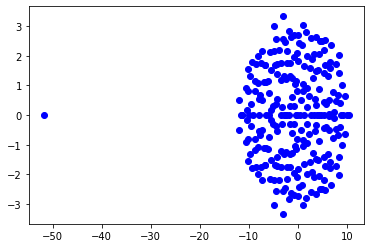

In [ ]:
S = 250
M = GenerarCompeticionGauss(S, -1.0, 0.5, 0.0, 1.0)
# Sacamos los autovalores
autovalores, autovectores = np.linalg.eig(M)

# Sacamos la parte real y la iamginaria
real = np.zeros_like(autovalores)
imag = np.zeros_like(autovalores)
for i in range(S):
  real[i] = np.real(autovalores[i])
  imag[i] = np.imag(autovalores[i])

plt.plot(real, imag, 'bo')
crearArchivo('Circular_Law_Competicion.dat')
file = open('Circular_Law_Competicion.dat', 'w', encoding = 'utf8')
for i in range(S):
  file.write(str(np.real(autovalores[i])) + ' ' + str(np.imag(autovalores[i])) + ' ' + '\n')
file.close()

### Red predador-presa con el modelo de nicho

In [ ]:
# Empezamos obteniendo una función que genere redes predador-presa con el modelo de nicho
def GenerarPredadorPresaNicho(S, d, C, media, sigma):
  # Empezamos sacando la matriz de adyacencia, A, en la cual Aij es 1 si i es presa de j

  A = np.zeros((S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(num < C):
        A[i, j] = 1.0

  # Sacamos la matriz P
  P = -A + A.T

  # Sacamos la matriz Y de una distribucion normal N(0, sigma), pero con elementos solo positivos
  Y = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      if(Y[i, j] < 0.0):
        Y[i, j] = -1.0*Y[i, j]
  
  # Ahora, podemos construir la matriz comunidad
  M = np.dot(Y, P)
  for i in range(S):
    M[i, i] = d

  return M
  

### Mixture entre mutualismo y competición

Aquí es lo mismo que antes, pero $M_{ij}$ y  $M_{ji}$ tienen el mismo signo, será un mix porque pueden tener ambos signo negativo(competición) o signo positivo(mutualismo)

In [ ]:
def GenerarMixture(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  a = media - np.sqrt(3.0)*sigma
  b = media + np.sqrt(3.0)*sigma
  M = a*np.random.rand(S, S) + b*np.random.rand(S, S)
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] < 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
def GenerarMixtureGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] < 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

Vamos a sacar 10 matrices para una red mixta entre mutualismo y competición, con los parámetros: 

\begin{equation}
  \begin{split}
    &\mu = 0\\
    &\sigma = 1\\
    &C = 0.25\\
    &S = 250\\**texto en negrita**
  \end{split}
\end{equation}

In [ ]:
for i in range(10):
  crearArchivo('M'+str(i)+'.dat')
  file = open('M' + str(i) + '.dat', 'w', encoding = 'utf8')
  M = GenerarMixtureGauss(250, -1.0, 0.25, 0.0, 1.0)
  autovalores, autovectores = np.linalg.eig(M)
  for j in range(250):
    file.write(str(np.real(autovalores[j])) + ' ' + str(np.imag(autovalores[j])) + '\n')
  file.close()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


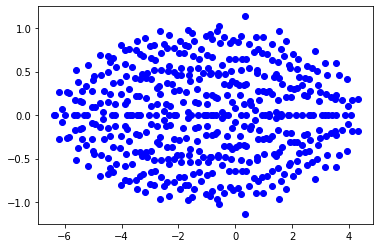

In [ ]:
M = GenerarMixture(S, -1.0, 0.2, 0.0, 1.0)
# Sacamos los autovalores
autovalores, autovectores = np.linalg.eig(M)

# Sacamos la parte real y la iamginaria
real = np.zeros_like(autovalores)
imag = np.zeros_like(autovalores)
for i in range(S):
  real[i] = np.real(autovalores[i])
  imag[i] = np.imag(autovalores[i])

plt.plot(real, imag, 'bo')

### Mutualismo

In [ ]:
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarMutuaGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j] < 0):
            M[i, j] = (-1.0)*M[i, j]
          if(M[j, i] < 0):
            M[j, i] = -1.0*M[j, i]
      else:
        M[i, j] = d
  
  return M

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


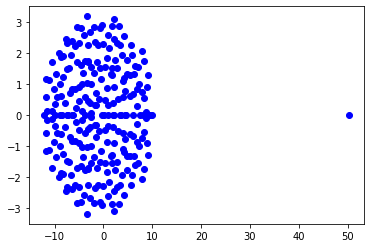

In [ ]:
S = 250
M = GenerarMutuaGauss(S, -1.0, 0.5, 0.0, 1.0)
# Sacamos los autovalores
autovalores, autovectores = np.linalg.eig(M)

# Sacamos la parte real y la iamginaria
real = np.zeros_like(autovalores)
imag = np.zeros_like(autovalores)
for i in range(S):
  real[i] = np.real(autovalores[i])
  imag[i] = np.imag(autovalores[i])

plt.plot(real, imag, 'bo')

crearArchivo('Circular_Law_Mutualismo.dat')
file = open('Circular_Law_Mutualismo.dat', 'w', encoding = 'utf8')
for i in range(S):
  file.write(str(np.real(autovalores[i])) + ' ' + str(np.imag(autovalores[i])) + ' ' + '\n')
file.close()

### Mutualismo bipartito

In [ ]:
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarMutuaBi(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  C_nueva = (2.0*C*(S-1))/S
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C_nueva):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j] < 0):
            M[i, j] = (-1.0)*M[i, j]
          if(M[j, i] < 0):
            M[j, i] = -1.0*M[j, i]
      else:
        M[i, j] = d
  
  return M

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


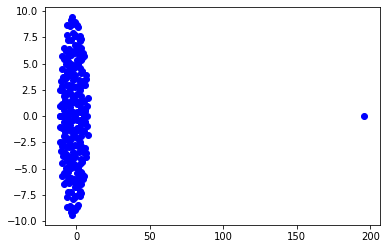

In [ ]:
S = 250
M = GenerarMutuaBi(S, -1.0, 0.5, 0.0, 1.0)
# Sacamos los autovalores
autovalores, autovectores = np.linalg.eig(M)

# Sacamos la parte real y la iamginaria
real = np.zeros_like(autovalores)
imag = np.zeros_like(autovalores)
for i in range(S):
  real[i] = np.real(autovalores[i])
  imag[i] = np.imag(autovalores[i])

plt.plot(real, imag, 'bo')

crearArchivo('Circular_Law_Mutualismo_Bi.dat')
file = open('Circular_Law_Mutualismo_Bi.dat', 'w', encoding = 'utf8')
for i in range(S):
  file.write(str(np.real(autovalores[i])) + ' ' + str(np.imag(autovalores[i])) + ' ' + '\n')
file.close()

# Cálculo de la probabilidad de estabilidad

## Para un ecosistema random generado por gaussiana

Ahora, vamos a calcular la probabilidad de estabilidad de una red aleatoria, para eso vamos a generar, para cada valor de la complejidad, 1000 matrices, con d = -1, S = 250, C = 0.5, y que los elementos no diagonales salgan de una gaussiana(en principio) de media 0 y una cierta sigma, iremos variando sigma, habrá que sacar todos los autovalores de cada matriz y ver si son estables, y se calcula la probabilidad de estabilidad.

Empezamos con sigma = 0.05, y vamos variando un paso = 0.0025, hasta 0.13, que son unos 32 puntos.

In [ ]:
M = np.random.normal(loc = 0, scale = 1.0, size=(3,3))
M

array([[-0.54980411,  0.27322503, -1.1444578 ],
       [ 1.58607345,  0.66851644, -0.46179017],
       [ 0.27397637,  1.30447964,  0.50804564]])

In [ ]:
# Empezamos creando la funcion que genere una matriz aleatoria con una gaussiana, la anterior que hemos hecho
# ha sido con una distribucion uniforme
def GenerarMRandomGauss(S, d, C, media, sigma):
  M = np.random.normal(loc = media, scale=sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j]=0.0
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad para un ecosistema random
N = 1000
S = 250
C = 0.5
sigma = 0.05
paso = 0.0025
P_random = [] # P es la lista de probabilidad de estabilidad
Compl_random = [] # Compl es la lista de complejidad
while(sigma < 0.15):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarMRandomGauss(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_random.extend([sigma*np.sqrt(S*C)])
  P_random.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_random.dat')
file = open('datos_random.dat', 'w', encoding='utf8')
for i in range(len(Compl_random)):
  file.write(str(Compl_random[i]) + ' ' + str(P_random[i]) + '\n')
file.close()

KeyboardInterrupt: ignored

In [ ]:
plt.plot(Compl_random, P_random, 'bo')

Se puede ver que la probabilidad de estabilidad sigue una distribución Lognormal, es decir, si una variable X sigue una distribución normal $N(\mu, \sigma^2)$, entonces $e^x$ sigue una distribución Lognormal$(\mu, \sigma^2)$.

Conviene mirar el artículo del tema de invarianza de escala de mitzenmacher.pdf por las primeras páginas donde habla de la distribución lognormal, si la varianza es suficientemente grande, entonces si ploteamos esto log-log, saldrá algo parecido a una ley de potencias, merece la pena echarle un buen vistazo.

In [ ]:
# Empezamos creando la funcion que genere una matriz aleatoria con una gaussiana, la anterior que hemos hecho
# ha sido con una distribucion uniforme
def GenerarMRandomGauss(S, d, C, media, sigma):
  M = np.random.normal(loc = media, scale=sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j]=0.0
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad para un ecosistema random
N = 1000
S = 250
C = 0.5
sigma = 0.0075
paso = 0.00005
P_random = [] # P es la lista de probabilidad de estabilidad
Compl_random = [] # Compl es la lista de complejidad
while(sigma < 0.0083):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarMRandomGauss(S, -1.0, C, sigma, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_random.extend([sigma*np.sqrt(S*C)])
  P_random.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_random_nodeb.dat')
file = open('datos_random_nodeb.dat', 'w', encoding='utf8')
for i in range(len(Compl_random)):
  file.write(str(Compl_random[i]) + ' ' + str(P_random[i]) + '\n')
file.close()

Para sigma = 0.0075 tenemos 0 matrices inestables.
Para sigma = 0.007549999999999999 tenemos 0 matrices inestables.
Para sigma = 0.007599999999999999 tenemos 0 matrices inestables.
Para sigma = 0.007649999999999999 tenemos 0 matrices inestables.
Para sigma = 0.0076999999999999985 tenemos 0 matrices inestables.
Para sigma = 0.007749999999999998 tenemos 0 matrices inestables.
Para sigma = 0.007799999999999998 tenemos 0 matrices inestables.
Para sigma = 0.007849999999999998 tenemos 2 matrices inestables.
Para sigma = 0.007899999999999997 tenemos 4 matrices inestables.
Para sigma = 0.007949999999999997 tenemos 64 matrices inestables.
Para sigma = 0.007999999999999997 tenemos 292 matrices inestables.
Para sigma = 0.008049999999999996 tenemos 628 matrices inestables.
Para sigma = 0.008099999999999996 tenemos 866 matrices inestables.
Para sigma = 0.008149999999999996 tenemos 987 matrices inestables.
Para sigma = 0.008199999999999995 tenemos 998 matrices inestables.
Para sigma = 0.008249999999

## Ecosistema aleatorio en el que no hay muchas interacciones débiles

Hasta donde hemos llegado, las interacciones débiles son más frecuentes cuando $\mu \approx 0$, mientras que serán menos frecuentes cuando $\mu \approx \sigma$, vamos a hacerlo aquí para este útlimo caso, para random, depredador-presa, y mixto. El resto de casos se ha hecho para interacciones débiles.

In [ ]:
# Empezamos creando la funcion que genere una matriz aleatoria con una gaussiana, la anterior que hemos hecho
# ha sido con una distribucion uniforme
def GenerarMRandomGauss(S, d, C, media, sigma):
  M = np.random.normal(loc = media, scale=sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j]=0.0
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad para un ecosistema random
N = 1000
S = 250
C = 0.5
sigma = 0.05
paso = 0.0025
P_random = [] # P es la lista de probabilidad de estabilidad
Compl_random = [] # Compl es la lista de complejidad
while(sigma < 0.15):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarMRandomGauss(S, -1.0, C, sigma, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_random.extend([sigma*np.sqrt(S*C)])
  P_random.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_random_nodeb.dat')
file = open('datos_random_nodeb.dat', 'w', encoding='utf8')
for i in range(len(Compl_random)):
  file.write(str(Compl_random[i]) + ' ' + str(P_random[i]) + '\n')
file.close()

## Mutualismo


In [ ]:
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad para un ecosistema random
N = 1000
S = 250
C = 0.5
sigma = 0.0185
paso = 0.0002
P_Mutua = [] # P es la lista de probabilidad de estabilidad
Compl_Mutua = [] # Compl es la lista de complejidad
while(sigma < 0.021):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarMutuaGauss(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Mutua.extend([sigma*np.sqrt(S*C)])
  P_Mutua.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_Mutua.dat')
file = open('datos_Mutua.dat', 'w', encoding='utf8')
for i in range(len(Compl_Mutua)):
  file.write(str(Compl_Mutua[i]) + ' ' + str(P_Mutua[i]) + '\n')
file.close()

Para sigma = 0.0185 tenemos 0 matrices inestables.
Para sigma = 0.018699999999999998 tenemos 0 matrices inestables.
Para sigma = 0.018899999999999997 tenemos 0 matrices inestables.
Para sigma = 0.019099999999999995 tenemos 0 matrices inestables.
Para sigma = 0.019299999999999994 tenemos 2 matrices inestables.
Para sigma = 0.019499999999999993 tenemos 35 matrices inestables.
Para sigma = 0.019699999999999992 tenemos 218 matrices inestables.
Para sigma = 0.01989999999999999 tenemos 527 matrices inestables.
Para sigma = 0.02009999999999999 tenemos 824 matrices inestables.
Para sigma = 0.020299999999999988 tenemos 945 matrices inestables.
Para sigma = 0.020499999999999987 tenemos 994 matrices inestables.
Para sigma = 0.020699999999999986 tenemos 1000 matrices inestables.
Para sigma = 0.020899999999999985 tenemos 1000 matrices inestables.


## Competición

In [ ]:
# Empezamos sacando la función con la cual generar las redes competitivas
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarCompeticionGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j] > 0):
            M[i, j] = (-1.0)*M[i, j]
          if(M[j, i] > 0):
            M[j, i] = -1.0*M[j, i]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad para un ecosistema random
N = 1000
S = 250
C = 0.5
sigma = 0.005
paso = 0.0025
P_Comp = [] # P es la lista de probabilidad de estabilidad
Compl_Comp = [] # Compl es la lista de complejidad
while(sigma < 0.15):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarCompeticionGauss(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Comp.extend([sigma*np.sqrt(S*C)])
  P_Comp.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_Comp.dat')
file = open('datos_Comp.dat', 'w', encoding='utf8')
for i in range(len(Compl_Comp)):
  file.write(str(Compl_Comp[i]) + ' ' + str(P_Comp[i]) + '\n')
file.close()

## Para una red de tipo predador-presa

Vamos a empezar con una red depredador presa tipo gaussiana, luego lo haremos con una uniforme, ya que también puede ser interesante para todos los casos (sin el caso random) hacerlo para las dos distribuciones. 

El caso es parecido, 1000 matrices por valor de la complejidad, C = 0.5, S = 250, y vamos variando la sigma, empezamos por sigma = 0.134 y terminamos en sigma = 0.358, con un paso de 0.007, salen 32 pasos.

In [ ]:
# Empezamos obteniendo la función que genere redes predador-presa, pero con gaussianas
def GenerarPredadorPresaGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] > 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.268
paso = 0.006
P_Pred_Gauss = [] # P es la lista de probabilidad de estabilidad
Compl_Pred_Gauss = [] # Compl es la lista de complejidad
while(sigma < 0.40):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarPredadorPresaGauss(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Pred_Gauss.extend([sigma*np.sqrt(S*C)])
  P_Pred_Gauss.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_PredGauss.dat')
file = open('datos_PredGauss.dat', 'w', encoding='utf8')
for i in range(len(Compl_Pred_Gauss)):
  file.write(str(Compl_Pred_Gauss[i]) + ' ' + str(P_Pred_Gauss[i]) + '\n')
file.close()



Para sigma = 0.268 tenemos 0 matrices inestables.


KeyboardInterrupt: ignored

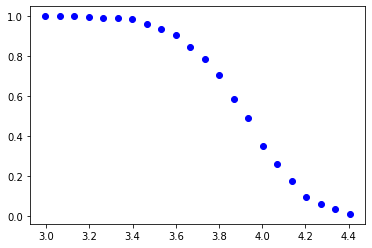

In [ ]:
plt.plot(Compl_Pred_Gauss, P_Pred_Gauss, 'bo')

Ahora, vamos a sacar la red predador presa pero con la distribucion uniforme, los parametros a usar son , en un principio, los mismos que para el caso de la red predador presa con una distribucion normal.

In [ ]:
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.358
paso = 0.007
P_Pred_Uni = [] # P es la lista de probabilidad de estabilidad
Compl_Pred_Uni = [] # Compl es la lista de complejidad
while(sigma < 0.6):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarPredadorPresa(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Pred_Uni.extend([sigma*np.sqrt(S*C)])
  P_Pred_Uni.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_PredUni.dat')
file = open('datos_PredUni.dat', 'w', encoding='utf8')
for i in range(len(Compl_Pred_Uni)):
  file.write(str(Compl_Pred_Uni[i]) + ' ' + str(P_Pred_Uni[i]) + '\n')
file.close()


Para sigma = 0.358 tenemos 0 matrices inestables.
Para sigma = 0.365 tenemos 0 matrices inestables.
Para sigma = 0.372 tenemos 0 matrices inestables.
Para sigma = 0.379 tenemos 0 matrices inestables.
Para sigma = 0.386 tenemos 0 matrices inestables.
Para sigma = 0.393 tenemos 0 matrices inestables.
Para sigma = 0.4 tenemos 0 matrices inestables.
Para sigma = 0.40700000000000003 tenemos 0 matrices inestables.
Para sigma = 0.41400000000000003 tenemos 0 matrices inestables.
Para sigma = 0.42100000000000004 tenemos 1 matrices inestables.
Para sigma = 0.42800000000000005 tenemos 3 matrices inestables.
Para sigma = 0.43500000000000005 tenemos 0 matrices inestables.
Para sigma = 0.44200000000000006 tenemos 6 matrices inestables.
Para sigma = 0.44900000000000007 tenemos 10 matrices inestables.
Para sigma = 0.45600000000000007 tenemos 15 matrices inestables.
Para sigma = 0.4630000000000001 tenemos 19 matrices inestables.
Para sigma = 0.4700000000000001 tenemos 31 matrices inestables.
Para sigma

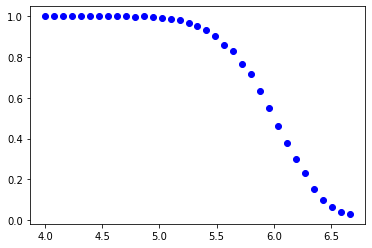

In [ ]:
plt.plot(Compl_Pred_Uni, P_Pred_Uni, 'bo')

## Para una red depredador presa sin muchas interacciones débiles

In [ ]:
# Empezamos obteniendo la función que genere redes predador-presa, pero con gaussianas
def GenerarPredadorPresaGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] > 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.268
paso = 0.006
P_Pred_Gauss = [] # P es la lista de probabilidad de estabilidad
Compl_Pred_Gauss = [] # Compl es la lista de complejidad
while(sigma < 0.40):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarPredadorPresaGauss(S, -1.0, C, sigma, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Pred_Gauss.extend([sigma*np.sqrt(S*C)])
  P_Pred_Gauss.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_PredGauss_nodeb.dat')
file = open('datos_PredGauss_nodeb.dat', 'w', encoding='utf8')
for i in range(len(Compl_Pred_Gauss)):
  file.write(str(Compl_Pred_Gauss[i]) + ' ' + str(P_Pred_Gauss[i]) + '\n')
file.close()


## Modelo de nicho de predador-presa

Vamos a obtener el modelo de nicho de la red predador presa, para eso, se ha recurrido al paper de suplementary information del artículo de Allesina de 2012

In [ ]:
# Empezamos obteniendo una función que genere redes predador-presa con el modelo de nicho
def GenerarPredadorPresaNicho(S, d, C, media, sigma):
  # Empezamos sacando la matriz de adyacencia, A, en la cual Aij es 1 si i es presa de j

  A = np.zeros((S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(num < C):
        A[i, j] = 1.0

  # Sacamos la matriz P
  P = -A + A.T

  # Sacamos la matriz Y de una distribucion normal N(0, sigma), pero con elementos solo positivos
  Y = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      if(Y[i, j] < 0.0):
        Y[i, j] = -1.0*Y[i, j]
  
  # Ahora, podemos construir la matriz comunidad
  M = np.dot(Y, P)
  for i in range(S):
    M[i, i] = d

  return M
  

In [ ]:
# Ahora, podemos estudiar la estabilidad de esta red
N = 1000
S = 250
C = 0.5
sigma = 0.358
paso = 0.007
P_Pred_Nicho = [] # P es la lista de probabilidad de estabilidad
Compl_Pred_Nicho = [] # Compl es la lista de complejidad
while(sigma < 0.6):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarPredadorPresaNicho(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Pred_Nicho.extend([sigma*np.sqrt(S*C)])
  P_Pred_Nicho.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_PredNicho.dat')
file = open('datos_PredNicho.dat', 'w', encoding='utf8')
for i in range(len(Compl_Pred_Nicho)):
  file.write(str(Compl_Pred_Nicho[i]) + ' ' + str(P_Pred_Nicho[i]) + '\n')
file.close()

## Mutualismo bipartito

In [ ]:
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarMutuaBi(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  C_nueva = (2.0*C*(S-1))/S
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C_nueva):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j] < 0):
            M[i, j] = (-1.0)*M[i, j]
          if(M[j, i] < 0):
            M[j, i] = -1.0*M[j, i]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.005
paso = 0.007
P_Pred_Cascada = [] # P es la lista de probabilidad de estabilidad
Compl_Pred_Cascada = [] # Compl es la lista de complejidad
while(sigma < 0.4):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarPredadorPresaCascade(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Pred_Cascada.extend([sigma*np.sqrt(S*C)])
  P_Pred_Cascada.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_PredCascada.dat')
file = open('datos_PredCascada.dat', 'w', encoding='utf8')
for i in range(len(Compl_Pred_Cascada)):
  file.write(str(Compl_Pred_Cascada[i]) + ' ' + str(P_Pred_Cascada[i]) + '\n')
file.close()

## Modelo de cascada de predador presa

In [ ]:
# Vamos a hacer la tercera funcion para generar una red predador presa con el modelo de cascada:
def GenerarPredadorPresaCascade(S, d, C, media, sigma):
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    j = 0
    if(j>i):
      M[i, j] = 0.0
    else:
        num = np.random.rand()
        if(num > C):
          M[i, j], M[j, i] = 0.0, 0.0
        else:
          M[i, j] = np.abs(M[i, j])
          M[j, i] = -np.abs(M[j, i])
    j += 1
  for i in range(S):
    M[i, i] = d
  return M

In [ ]:
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.054
paso = 0.001
P_Pred_Cascada = [] # P es la lista de probabilidad de estabilidad
Compl_Pred_Cascada = [] # Compl es la lista de complejidad
while(sigma < 0.075):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarPredadorPresaCascade(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Pred_Cascada.extend([sigma*np.sqrt(S*C)])
  P_Pred_Cascada.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_PredCascada.dat')
file = open('datos_PredCascada.dat', 'w', encoding='utf8')
for i in range(len(Compl_Pred_Cascada)):
  file.write(str(Compl_Pred_Cascada[i]) + ' ' + str(P_Pred_Cascada[i]) + '\n')
file.close()

Para sigma = 0.054 tenemos 0 matrices inestables.
Para sigma = 0.055 tenemos 0 matrices inestables.
Para sigma = 0.056 tenemos 1 matrices inestables.
Para sigma = 0.057 tenemos 5 matrices inestables.
Para sigma = 0.058 tenemos 4 matrices inestables.
Para sigma = 0.059000000000000004 tenemos 18 matrices inestables.
Para sigma = 0.060000000000000005 tenemos 41 matrices inestables.
Para sigma = 0.061000000000000006 tenemos 84 matrices inestables.
Para sigma = 0.062000000000000006 tenemos 143 matrices inestables.
Para sigma = 0.063 tenemos 236 matrices inestables.
Para sigma = 0.064 tenemos 393 matrices inestables.
Para sigma = 0.065 tenemos 557 matrices inestables.
Para sigma = 0.066 tenemos 719 matrices inestables.
Para sigma = 0.067 tenemos 862 matrices inestables.
Para sigma = 0.068 tenemos 947 matrices inestables.
Para sigma = 0.069 tenemos 984 matrices inestables.
Para sigma = 0.07 tenemos 994 matrices inestables.
Para sigma = 0.07100000000000001 tenemos 999 matrices inestables.
Para

## Red Mixta entre mutualismo y competición (Gaussiana)

Se va hacer esto mismo, para el caso mixto entre competición y mutualismo, para esto, también vamos a disntiguir entre el caso generados por una gaussiana y generados por una distribución uniforme, empezaremos por la gaussiana.

Los parametros serán los mismos: 1000 matrices, S = 250, C = 0.5, d = -1.0, y empezaremos con media = 0. La sigma incial es 0.027, la final 0.089 y tendremos un paso de 0.002, dando lugar a 31 puntos.

In [ ]:
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarMixtureGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] < 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, sacamos la probabilidad de estabilidad para el caso gaussiano
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.05
paso = 0.001
P_Mix_Gauss = [] # P es la lista de probabilidad de estabilidad
Compl_Mix_Gauss = [] # Compl es la lista de complejidad
while(sigma < 0.098):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarMixtureGauss(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Mix_Gauss.extend([sigma*np.sqrt(S*C)])
  P_Mix_Gauss.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_Mix_Gauss.dat')
file = open('datos_MixGauss.dat', 'w', encoding='utf8')
for i in range(len(Compl_Mix_Gauss)):
  file.write(str(Compl_Mix_Gauss[i]) + ' ' + str(P_Mix_Gauss[i]) + '\n')
file.close()

Para sigma = 0.05 tenemos 0 matrices inestables.
Para sigma = 0.051000000000000004 tenemos 0 matrices inestables.
Para sigma = 0.052000000000000005 tenemos 0 matrices inestables.
Para sigma = 0.053000000000000005 tenemos 0 matrices inestables.
Para sigma = 0.054000000000000006 tenemos 0 matrices inestables.
Para sigma = 0.05500000000000001 tenemos 0 matrices inestables.
Para sigma = 0.05600000000000001 tenemos 0 matrices inestables.
Para sigma = 0.05700000000000001 tenemos 0 matrices inestables.
Para sigma = 0.05800000000000001 tenemos 0 matrices inestables.
Para sigma = 0.05900000000000001 tenemos 0 matrices inestables.
Para sigma = 0.06000000000000001 tenemos 0 matrices inestables.
Para sigma = 0.06100000000000001 tenemos 0 matrices inestables.
Para sigma = 0.06200000000000001 tenemos 0 matrices inestables.
Para sigma = 0.06300000000000001 tenemos 0 matrices inestables.
Para sigma = 0.06400000000000002 tenemos 0 matrices inestables.
Para sigma = 0.06500000000000002 tenemos 0 matrices

In [ ]:
Compl_Mix_Gauss

[]

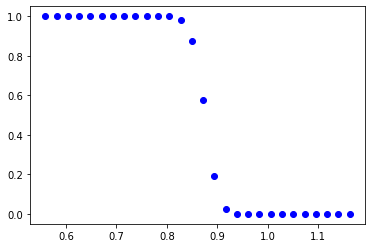

In [ ]:
plt.plot(Compl_Mix_Gauss, P_Mix_Gauss, 'bo')

Ahora, lo hacemos para el caso uniforme:

In [ ]:
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.027
paso = 0.007
P_Mix_Uni = [] # P es la lista de probabilidad de estabilidad
Compl_Mix_Uni = [] # Compl es la lista de complejidad
while(sigma < 0.189):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarMixture(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Mix_Uni.extend([sigma*np.sqrt(S*C)])
  P_Mix_Uni.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_Mix_Uni.dat')
file = open('datos_Mix_Uni.dat', 'w', encoding='utf8')
for i in range(len(Compl_Mix_Uni)):
  file.write(str(Compl_Mix_Uni[i]) + ' ' + str(P_Mix_Uni[i]) + '\n')
file.close()

Para sigma = 0.027 tenemos 0 matrices inestables.
Para sigma = 0.034 tenemos 0 matrices inestables.
Para sigma = 0.041 tenemos 0 matrices inestables.
Para sigma = 0.048 tenemos 0 matrices inestables.
Para sigma = 0.055 tenemos 0 matrices inestables.
Para sigma = 0.062 tenemos 0 matrices inestables.
Para sigma = 0.069 tenemos 0 matrices inestables.
Para sigma = 0.07600000000000001 tenemos 0 matrices inestables.
Para sigma = 0.08300000000000002 tenemos 0 matrices inestables.
Para sigma = 0.09000000000000002 tenemos 0 matrices inestables.
Para sigma = 0.09700000000000003 tenemos 0 matrices inestables.
Para sigma = 0.10400000000000004 tenemos 53 matrices inestables.
Para sigma = 0.11100000000000004 tenemos 792 matrices inestables.
Para sigma = 0.11800000000000005 tenemos 1000 matrices inestables.
Para sigma = 0.12500000000000006 tenemos 1000 matrices inestables.
Para sigma = 0.13200000000000006 tenemos 1000 matrices inestables.


KeyboardInterrupt: ignored

In [ ]:
crearArchivo('datos_Mix_Uni.dat')
file = open('datos_Mix_Uni.dat', 'w', encoding='utf8')
for i in range(len(Compl_Mix_Uni)):
  file.write(str(Compl_Mix_Uni[i]) + ' ' + str(P_Mix_Uni[i]) + '\n')
file.close()

## Ecosistema mixto entre competición y mutualismo sin interacciones débiles

In [ ]:
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarMixtureGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] < 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, sacamos la probabilidad de estabilidad para el caso gaussiano
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.05
paso = 0.001
P_Mix_Gauss = [] # P es la lista de probabilidad de estabilidad
Compl_Mix_Gauss = [] # Compl es la lista de complejidad
while(sigma < 0.098):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarMixtureGauss(S, -1.0, C, sigma, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Mix_Gauss.extend([sigma*np.sqrt(S*C)])
  P_Mix_Gauss.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_Mix_Gauss_nodeb.dat')
file = open('datos_MixGauss_nodeb.dat', 'w', encoding='utf8')
for i in range(len(Compl_Mix_Gauss)):
  file.write(str(Compl_Mix_Gauss[i]) + ' ' + str(P_Mix_Gauss[i]) + '\n')
file.close()

## Mixture entre mutualismo y competición (Uniforme)

In [ ]:
def GenerarMixture(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  a = media - np.sqrt(3.0)*sigma
  b = media + np.sqrt(3.0)*sigma
  M = a*np.random.rand(S, S) + b*np.random.rand(S, S)
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] < 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos sacar la probabilidad de estabilidad para este tipo de red
# Ahora, podemos hacer lo de sacar la probabilidad de estabilidad
N = 1000
S = 250
C = 0.5
sigma = 0.027
paso = 0.007
P_Mix_Uni = [] # P es la lista de probabilidad de estabilidad
Compl_Mix_Uni = [] # Compl es la lista de complejidad
while(sigma < 0.089):
  contador = 0 # El contador nos dirá cuantas matrices inestables hay, es mas facil
  # porque en el momento que hay un autovalor negativo  para de mirar los demas, lo cual
  # puede acortar el proceso
  for i in range(N):
    # Construimos las matrices
    M = GenerarMixture(S, -1.0, C, 0.0, sigma)

    # Sacamos los autovalores
    autovalores, autovectores = np.linalg.eig(M)
    
    # Miramos si hay alguno mayor que 0, sacando una matriz inestable
    estable = True
    j = 0
    while((estable == True)and(j < S)):
      if(autovalores[j] > 0):
        estable = False
        contador += 1
      j += 1
    
    
  print('Para sigma = ' + str(sigma) + ' tenemos ' + str(contador) + ' matrices inestables.')
  Compl_Mix_Uni.extend([sigma*np.sqrt(S*C)])
  P_Mix_Uni.extend([1-(contador*1.0)/(N*1.0)])
  sigma += paso

crearArchivo('datos_Mix_Uni.dat')
for i in range(len(Compl_Mix_Uni)):
  file.write(str(Compl_Mix_Uni[i]) + ' ' + str(P_Mix_Uni[i]) + '\n')
file.close()

# Obtención de la relación de S y C para el límite de estabilidad, Ley de potencias

Para obtener esto, se va a hacer lo siguiente:

- Damos un S inicial
  - Damos un C inicial (S = 5)
  -Generamos 1000 matrices aleatorias con los parámetros S, C, $\mu = 0$, $\sigma = 0.25$ y $d = 1.0$.
  -Sacamos la probabilidad de estabilidad para estos parámetros.
  -Según el valor de P, tenemos dos opciones:
    1. Si P>0.5, entonces C = C +0.005 y se vuelven a generar 1000 matrices para obtener la probabilidad de estabilidad.
    2. Si P < 0.5, entonces guardamos estos valores de C y S para el primer valor de C, damos S = S + 5 y volvemos a empezar con otro S.
- Así hasta S = 1000.

## Caso de ecosistema random

In [ ]:
#Iremos de S = 100 a S = 1000
S = 1000
N = 1000
pasoC = 0.001
pasoS = 50
tamano, conectividad = [], []
while(S < 1001):
  C = 0.015
  P = 1.0
  while(P > 0.5):
    # Generamos 1000 matrices para estos parámetros y sacamos su estabilidad
    contador = 0 # El contador cuenta las matrices que salen inestables
    for j in range(N):
      M = GenerarMRandomGauss(S, -1.0, C, 0.0, 0.25)
      # Sacamos los autovalores de la matriz
      autovalores, autovectores = np.linalg.eig(M)
      # Miramos si la matriz es estable
      EsEstable = True
      i = 0
      while((EsEstable == True) and (i < S)):
        if(autovalores[i] > 0.0):
          EsEstable = False
          contador += 1
        else:
          i += 1
    
    # Ya podemos sacar la probabilidad de establidad para estos parámetros:
    P = 1 - (contador*1.0)/(N*1.0)
    print(str(P) + ' ' + str(C))
    C += pasoC
  
  conectividad.extend([C])
  tamano.extend([S])
  print('Para un tamaño ' + str(S) + ' tenemos una conectividad ' + str(C))
  print(P)
  S += pasoS

crearArchivo('Power_Law.dat')
file = open('Power_Law.dat', 'w', encoding='utf8')
for i in range(len(tamano)):
  file.write(str(tamano[i]) + ' ' + str(conectividad[i]) + '\n')
file.close()


0.943 0.015
0.621 0.016
0.06399999999999995 0.017
Para un tamaño 1000 tenemos una conectividad 0.018000000000000002
0.06399999999999995


Vamos a hacer el ajuste lineal de la Ley de potencias para obtener el exponente

In [ ]:
# Hacemos el ajuste de esto, deberia salir alfa = 1
from pylab import *
x = np.log(tamano)
y = np.log(conectividad)
m,b = polyfit(x, y, 1)

NameError: ignored

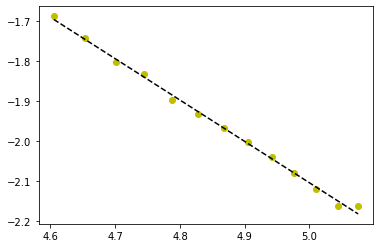

In [ ]:
plot(x, y, 'yo', x, m*x+b, '--k') 

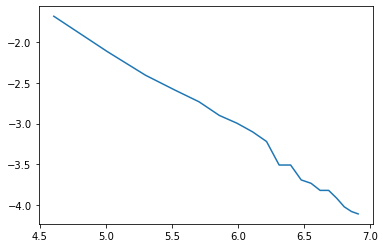

In [ ]:
# Escribimos los vectores de los resultados para luego hacer el ajuste
x_random = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000] 
y_random = [0.185, 0.12, 0.09, 0.075, 0.065, 0.055, 0.05, 0.045, 0.04, 0.03, 0.03, 0.025, 0.024, 0.022, 0.022, 0.02, 0.018, 0.017, 0.0165]
plt.plot(np.log(x_random), np.log(y_random))

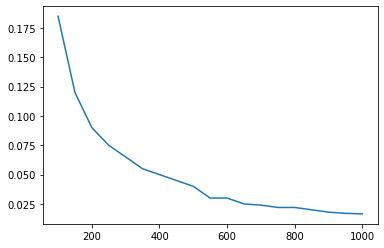

In [ ]:
plt.plot(x_random, y_random)

In [ ]:
# Hacemos el ajuste
from pylab import *
m_random,b_random = polyfit(np.log(x_random), np.log(y_random), 1)

In [ ]:
m_random, b_random

(-1.0654978066774627, 3.2829716172422017)

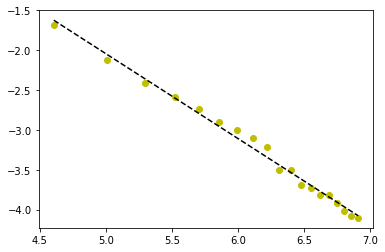

In [ ]:
plt.plot(np.log(x_random), np.log(y_random), 'yo', np.log(x_random), m*np.log(x_random)+b, '--k') 

In [ ]:
# Vamos a pasar todos estos datos a un fichero para que sea más fácil el manejo y demás
crearArchivo('Power_Law_random.dat')
file = open('Power_Law_random.dat', 'w', encoding='utf8')
file.write('#(eje x)S(tamaño del sistema) (eje y)C(conectividad maxima que permite el sistema)  log(S)  log(C)' + '\n')
for i in range(len(x_random)):
  file.write(str(x_random[i]) + ' ' + str(y_random[i]) +  ' ' + str(np.log(x_random[i])) + ' ' + str(np.log(y_random[i])) + '\n')
file.close()

## Caso de ecosistema predador-presa

En este caso, se ha sacado de la misma manera que antes, pero generando una red predador-presa, luego se ha obtenido el ajuste de la Ley de potencias.

In [ ]:
#Predador-presa para el caso gausiano, iremos de S = 100 a S = 1000
S = 100
N = 1000
pasoC = 0.005
pasoS = 50
tamano, conectividad = [], []
while(S < 1000):
  C = 0.005
  P = 1.0
  while(P > 0.5):
    # Generamos 1000 matrices para estos parámetros y sacamos su estabilidad
    contador = 0 # El contador cuenta las matrices que salen inestables
    for j in range(N):
      M = GenerarPredadorPresaGauss(S, -1.0, C, 0.0, 0.25)
      # Sacamos los autovalores de la matriz
      autovalores, autovectores = np.linalg.eig(M)
      # Miramos si la matriz es estable
      EsEstable = True
      i = 0
      while((EsEstable == True) and (i < S)):
        if(autovalores[i] > 0.0):
          EsEstable = False
          contador += 1
        else:
          i += 1
    
    # Ya podemos sacar la probabilidad de establidad para estos parámetros:
    P = 1 - (contador*1.0)/(N*1.0)
    print(str(P) + ' ' + str(C))
    C += pasoC
  
  conectividad.extend([C])
  tamano.extend([S])
  print('Para un tamaño ' + str(S) + ' tenemos una conectividad ' + str(C))
  print(P)
  S += pasoS

crearArchivo('Power_Law_PP_Gauss.dat')
file = open('Power_Law_PP_Gauss.dat', 'w', encoding='utf8')
for i in range(len(tamano)):
  file.write(str(tamano[i]) + ' ' + str(conectividad[i]) + '\n')
file.close()

In [ ]:
# Como se han obtenido los datos poco a poco, se han definido los vectores de resultados tal cual
x_Pred = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
y_Pred = [0.645, 0.59, 0.55, 0.52, 0.49, 0.47, 0.45, 0.43, 0.415, 0.4, 0.385, 0.378, 0.365, 0.355, 0.348]

In [ ]:
plt.plot(x_Pred, y_Pred)

In [ ]:
# Hacemos el ajuste
from pylab import *
m_Pred,b_Pred = polyfit(np.log(x_Pred), np.log(y_Pred), 1)
m_Pred, b_Pred

(-0.5737235342623382, 1.1657550938808883)

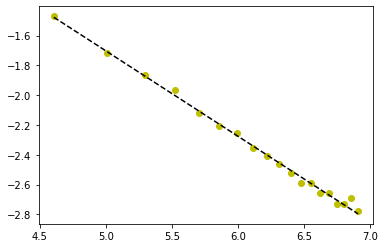

In [ ]:
# Representamos la ley de potencias logaritmica
plt.plot(np.log(x_Pred), np.log(y_Pred), 'yo', np.log(x_Pred), m_Pred*np.log(x_Pred)+b_Pred, '--k') 

In [ ]:
# Lo pasamos todo a un fichero para tenerlo todo más facilito
# Vamos a pasar todos estos datos a un fichero para que sea más fácil el manejo y demás
crearArchivo('Power_Law_PredadorPresa.dat')
file = open('Power_Law_PredadorPresa.dat', 'w', encoding='utf8')
file.write('#(eje x)S(tamaño del sistema) (eje y)C(conectividad maxima que permite el sistema)  log(S)  log(C)' + '\n')
for i in range(len(x_Pred)):
  file.write(str(x_Pred[i]) + ' ' + str(y_Pred[i]) +  ' ' + str(np.log(x_Pred[i])) + ' ' + str(np.log(y_Pred[i])) + '\n')
file.close()

## Predador presa para el caso gaussiano

In [ ]:
S = 100
N = 1000
pasoC = 0.005
pasoS = 50
tamano, conectividad = [], []
while(S < 1000):
  C = 0.005
  P = 1.0
  while(P > 0.5):
    # Generamos 1000 matrices para estos parámetros y sacamos su estabilidad
    contador = 0 # El contador cuenta las matrices que salen inestables
    for j in range(N):
      M = GenerarPredadorPresaGauss(S, -1.0, C, 0.0, 0.25)
      # Sacamos los autovalores de la matriz
      autovalores, autovectores = np.linalg.eig(M)
      # Miramos si la matriz es estable
      EsEstable = True
      i = 0
      while((EsEstable == True) and (i < S)):
        if(autovalores[i] > 0.0):
          EsEstable = False
          contador += 1
        else:
          i += 1
    
    # Ya podemos sacar la probabilidad de establidad para estos parámetros:
    P = 1 - (contador*1.0)/(N*1.0)
    print(str(P) + ' ' + str(C))
    C += pasoC
  
  conectividad.extend([C])
  tamano.extend([S])
  print('Para un tamaño ' + str(S) + ' tenemos una conectividad ' + str(C))
  print(P)
  S += pasoS

crearArchivo('Power_Law_PP_Gauss.dat')
file = open('Power_Law_PP_Gauss.dat', 'w', encoding='utf8')
for i in range(len(tamano)):
  file.write(str(tamano[i]) + ' ' + str(conectividad[i]) + '\n')
file.close()

In [ ]:
# Vamos a hacer el ajuste lineal para sacar el exponente de la Ley de potencias
x_PPG, y_PPG = 

## Caso mixto entre mutualismo y competición

In [ ]:
#Predador-presa para el caso gausiano, iremos de S = 100 a S = 1000
S = 300
N = 1000
pasoC = 0.005
pasoS = 50
tamano, conectividad = [], []
while(S < 1000):
  C = 0.05
  P = 1.0
  while(P > 0.5):
    # Generamos 1000 matrices para estos parámetros y sacamos su estabilidad
    contador = 0 # El contador cuenta las matrices que salen inestables
    for j in range(N):
      M = GenerarMixtureGauss(S, -1.0, C, 0.0, 0.25)
      # Sacamos los autovalores de la matriz
      autovalores, autovectores = np.linalg.eig(M)
      # Miramos si la matriz es estable
      EsEstable = True
      i = 0
      while((EsEstable == True) and (i < S)):
        if(autovalores[i] > 0.0):
          EsEstable = False
          contador += 1
        else:
          i += 1
    
    # Ya podemos sacar la probabilidad de establidad para estos parámetros:
    P = 1 - (contador*1.0)/(N*1.0)
    print(str(P) + ' ' + str(C))
    C += pasoC
  
  conectividad.extend([C])
  tamano.extend([S])
  print('Para un tamaño ' + str(S) + ' tenemos una conectividad ' + str(C))
  print(P)
  S += pasoS

crearArchivo('Power_Law_Mix_Gauss.dat')
file = open('Power_Law_Mix_Gauss.dat', 'w', encoding='utf8')
for i in range(len(tamano)):
  file.write(str(tamano[i]) + ' ' + str(conectividad[i]) + '\n')
file.close()

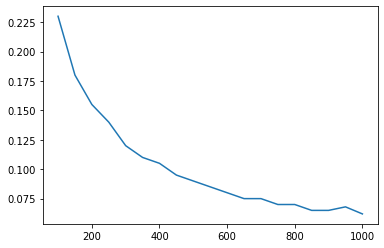

In [ ]:
# Como se han obtenido los datos poco a poco, se han definido los vectores de resultados tal cual
x_Mix = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
y_Mix = [0.23, 0.18, 0.155, 0.14, 0.12, 0.11, 0.105, 0.095, 0.09, 0.085, 0.08, 0.075, 0.075, 0.07, 0.07, 0.065, 0.065, 0.068, 0.062]

# Representamos la gráfica
plt.plot(x_Mix, y_Mix);

In [ ]:
# Hacemos el ajuste
from pylab import *
m_Mix,b_Mix = polyfit(np.log(x_Mix), np.log(y_Mix), 1)
m_Mix, b_Mix

(-0.5737235342623382, 1.1657550938808883)

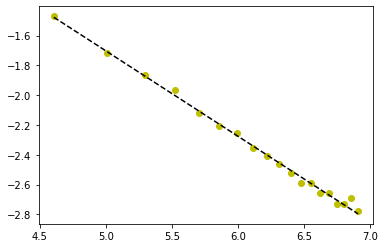

In [ ]:
# Representamos la ley de potencias logaritmica
plt.plot(np.log(x_Mix), np.log(y_Mix), 'yo', np.log(x_Mix), m_Mix*np.log(x_Mix)+b_Mix, '--k') 

In [ ]:
# Lo pasamos todo a un fichero para tenerlo todo más facilito
# Vamos a pasar todos estos datos a un fichero para que sea más fácil el manejo y demás
crearArchivo('Power_Law_Mixture.dat')
file = open('Power_Law_Mixture.dat', 'w', encoding='utf8')
file.write('#(eje x)S(tamaño del sistema) (eje y)C(conectividad maxima que permite el sistema)  log(S)  log(C)' + '\n')
for i in range(len(x_Mix)):
  file.write(str(x_Mix[i]) + ' ' + str(y_Mix[i]) +  ' ' + str(np.log(x_Mix[i])) + ' ' + str(np.log(y_Mix[i])) + '\n')
file.close()

## Caso para el mutualismo

En este caso, no solo los elementos cruzados tienen el mismo signo, si no que además son todos positivos

In [ ]:
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarMutuaGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j] < 0):
            M[i, j] = (-1.0)*M[i, j]
          if(M[j, i] < 0):
            M[j, i] = -1.0*M[j, i]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, vamos a sacar la Ley de potencias para el caso de mutualismo
#Predador-presa para el caso gausiano, iremos de S = 100 a S = 1000
S = 900
N = 1000
pasoC = 0.005
pasoS = 50
tamano, conectividad = [], []
while(S <= 1000):
  C = 0.05
  P = 1.0
  while(P > 0.5):
    # Generamos 1000 matrices para estos parámetros y sacamos su estabilidad
    contador = 0 # El contador cuenta las matrices que salen inestables
    for j in range(N):
      M = GenerarMutuaGauss(S, -1.0, C, 0.0, 0.25)
      # Sacamos los autovalores de la matriz
      autovalores, autovectores = np.linalg.eig(M)
      # Miramos si la matriz es estable
      EsEstable = True
      i = 0
      while((EsEstable == True) and (i < S)):
        if(autovalores[i] > 0.0):
          EsEstable = False
          contador += 1
        else:
          i += 1
    
    # Ya podemos sacar la probabilidad de establidad para estos parámetros:
    P = 1 - (contador*1.0)/(N*1.0)
    print(str(P) + ' ' + str(C))
    C += pasoC
  
  conectividad.extend([C])
  tamano.extend([S])
  print('Para un tamaño ' + str(S) + ' tenemos una conectividad ' + str(C))
  print(P)
  S += pasoS

crearArchivo('Power_Law_Mutua_Gauss.dat')
file = open('Power_Law_Mutua_Gauss.dat', 'w', encoding='utf8')
for i in range(len(tamano)):
  file.write(str(tamano[i]) + ' ' + str(conectividad[i]) + '\n')
file.close()

0.992 0.045
0.96 0.049999999999999996
0.9 0.05499999999999999
0.639 0.05999999999999999
0.017000000000000015 0.06499999999999999
Para un tamaño 900 tenemos una conectividad 0.06999999999999999
0.017000000000000015
0.991 0.045
0.957 0.049999999999999996
0.85 0.05499999999999999
0.398 0.05999999999999999
Para un tamaño 950 tenemos una conectividad 0.06499999999999999
0.398
0.991 0.045
0.94 0.049999999999999996
0.8069999999999999 0.05499999999999999
0.15200000000000002 0.05999999999999999
Para un tamaño 1000 tenemos una conectividad 0.06499999999999999
0.15200000000000002


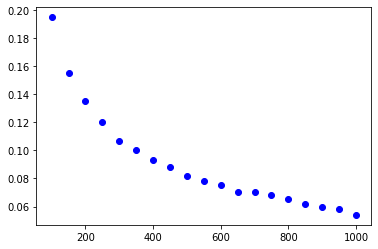

In [ ]:
# Ahora, vamos a realizar el ajuste lineal, para eso definimos los vectores con los datos que nos han dado
x_Mutua = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
y_Mutua = [0.195, 0.155, 0.135, 0.12, 0.107, 0.1, 0.093, 0.088, 0.082, 0.078, 0.075, 0.07, 0.07, 0.068, 0.065, 0.062, 0.06, 0.058, 0.054]

# Representamos la gráfica
plt.plot(x_Mutua, y_Mutua, 'bo')

In [ ]:
# Hacemos el ajuste
from pylab import *
m_Mutua,b_Mutua = polyfit(np.log(x_Mutua), np.log(y_Mutua), 1)
m_Mutua, b_Mutua

(-0.5372239592825614, 0.8403794019319843)

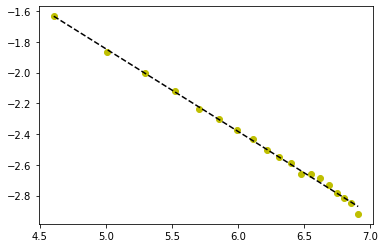

In [ ]:
# Representamos la ley de potencias logaritmica
plt.plot(np.log(x_Mutua), np.log(y_Mutua), 'yo', np.log(x_Mutua), m_Mutua*np.log(x_Mutua)+b_Mutua, '--k') 

In [ ]:
# Lo pasamos todo a un fichero para tenerlo todo más facilito
# Vamos a pasar todos estos datos a un fichero para que sea más fácil el manejo y demás
crearArchivo('Power_Law_Mutua.dat')
file = open('Power_Law_Mutua.dat', 'w', encoding='utf8')
file.write('#(eje x)S(tamaño del sistema) (eje y)C(conectividad maxima que permite el sistema)  log(S)  log(C)' + '\n')
for i in range(len(x_Mutua)):
  file.write(str(x_Mutua[i]) + ' ' + str(y_Mutua[i]) +  ' ' + str(np.log(x_Mutua[i])) + ' ' + str(np.log(y_Mutua[i])) + '\n')
file.close()

## Caso de competición

En este caso no solo los elementos cruzados tienen el mismo signo, sino que ademas son todos negativos

In [ ]:
# Empezamos sacando la función con la cual generar las redes competitivas
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarCompeticionGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j] > 0):
            M[i, j] = (-1.0)*M[i, j]
          if(M[j, i] > 0):
            M[j, i] = -1.0*M[j, i]
      else:
        M[i, j] = d
  
  return M

In [ ]:
# Ahora, podemos sacar las leyes de potencias para redes competitivas
# Ahora, vamos a sacar la Ley de potencias para el caso de mutualismo
#Predador-presa para el caso gausiano, iremos de S = 100 a S = 1000
S = 700
N = 1000
pasoC = 0.005
pasoS = 50
tamano, conectividad = [], []
while(S <= 1000):
  C = 0.05
  P = 1.0
  while(P > 0.5):
    # Generamos 1000 matrices para estos parámetros y sacamos su estabilidad
    contador = 0 # El contador cuenta las matrices que salen inestables
    for j in range(N):
      M = GenerarCompeticionGauss(S, -1.0, C, 0.0, 0.25)
      # Sacamos los autovalores de la matriz
      autovalores, autovectores = np.linalg.eig(M)
      # Miramos si la matriz es estable
      EsEstable = True
      i = 0
      while((EsEstable == True) and (i < S)):
        if(autovalores[i] > 0.0):
          EsEstable = False
          contador += 1
        else:
          i += 1
    
    # Ya podemos sacar la probabilidad de establidad para estos parámetros:
    P = 1 - (contador*1.0)/(N*1.0)
    print(str(P) + ' ' + str(C))
    C += pasoC
  
  conectividad.extend([C])
  tamano.extend([S])
  print('Para un tamaño ' + str(S) + ' tenemos una conectividad ' + str(C))
  print(P)
  S += pasoS

crearArchivo('Power_Law_Competicion_Gauss.dat')
file = open('Power_Law_Competicion_Gauss.dat', 'w', encoding='utf8')
for i in range(len(tamano)):
  file.write(str(tamano[i]) + ' ' + str(conectividad[i]) + '\n')
file.close()

KeyboardInterrupt: ignored

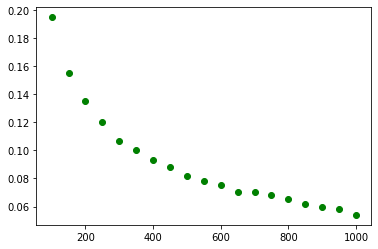

In [ ]:
# Ahora, vamos a obtener el ajuste, definimos los vectores de los resultados
x_Comp = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
y_Comp = [0.195, 0.155, 0.135, 0.12, 0.107, 0.1, 0.093, 0.088, 0.082, 0.078, 0.075, 0.07, 0.07, 0.068, 0.065, 0.062, 0.06, 0.058, 0.054]

# Representamos la power law
plt.plot(x_Comp, y_Comp, 'go')

In [ ]:
# Sacamos el ajuste
from pylab import *
m_Comp, b_Comp = polyfit(np.log(x_Comp), np.log(y_Comp), 1)

m_Comp, b_Comp

(-0.5372239592825614, 0.8403794019319843)

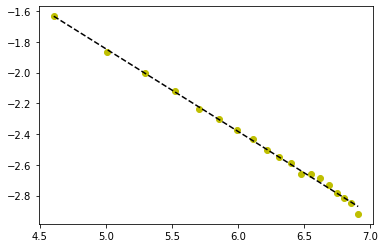

In [ ]:
plt.plot(np.log(x_Comp), np.log(y_Comp), 'yo', np.log(x_Comp), m_Comp*np.log(x_Comp) + b_Comp, '--k')

In [ ]:
# Lo pasamos todo a un fichero para tenerlo todo más facilito
# Vamos a pasar todos estos datos a un fichero para que sea más fácil el manejo y demás
crearArchivo('Power_Law_Comp.dat')
file = open('Power_Law_Comp.dat', 'w', encoding='utf8')
file.write('#(eje x)S(tamaño del sistema) (eje y)C(conectividad maxima que permite el sistema)  log(S)  log(C)' + '\n')
for i in range(len(x_Comp)):
  file.write(str(x_Comp[i]) + ' ' + str(y_Comp[i]) +  ' ' + str(np.log(x_Comp[i])) + ' ' + str(np.log(y_Comp[i])) + '\n')
file.close()